## Zadanie: analiza danych

W tym module analizowaliśmy bazę danych z informacjami dotyczącymi pracowników pewnego amerykańskiego przedsiębiorstwa. Główną wagę przywiązaliśmy do stawki wynagrodzenia, jest tam jednak wiele innych obszarów, którym moglibyśmy się przyjrzeć. Jako zadanie zastanów się i postaraj się odpowiedzieć na następujące pytania:
1) Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?
2) Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?
3) Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?
4) Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?
5) Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

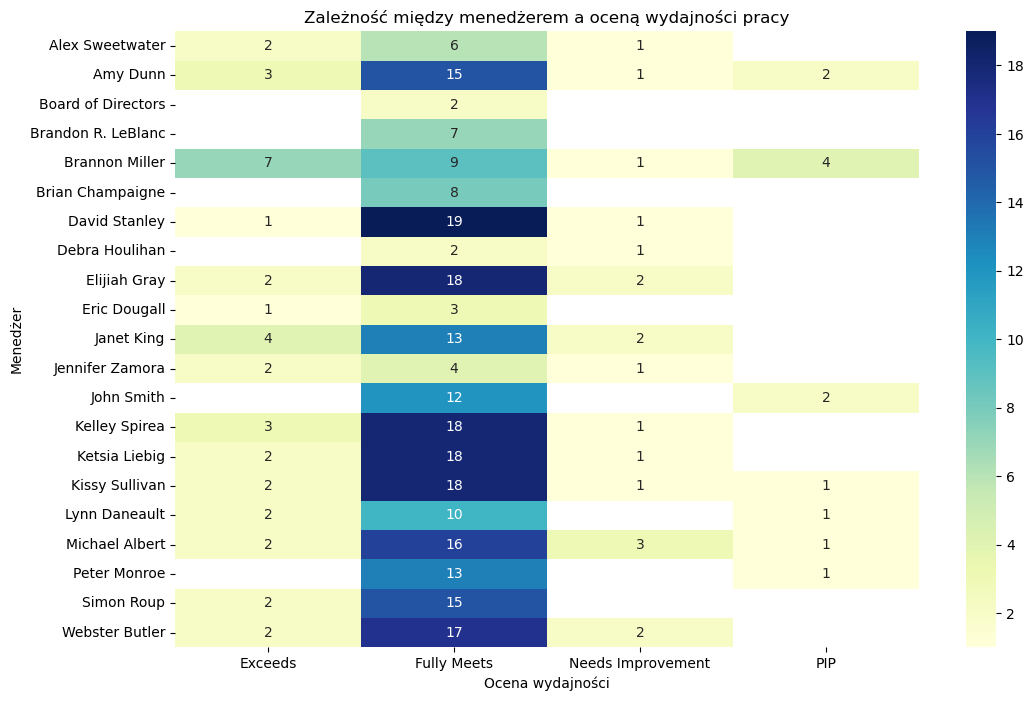

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych
df = pd.read_csv('HRDataset.csv')

# Grupowanie danych według menedżera i oceny wydajności
manager_performance = df.groupby(['ManagerName', 'PerformanceScore']).size().unstack()

# Wizualizacja
plt.figure(figsize=(12, 8))
# Zmieniono fmt='d' na fmt='.0f' aby poprawnie wyświetlać liczby zmiennoprzecinkowe
sns.heatmap(manager_performance, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Zależność między menedżerem a oceną wydajności pracy')
plt.xlabel('Ocena wydajności')
plt.ylabel('Menedżer')
plt.show()

### Wnioski:
Wizualizacja pokazuje, jak oceny wydajności są rozłożone wśród pracowników pod różnymi menedżerami.<br>
Jeśli u niektórych menedżerów dominują oceny "Exceeds", może to wskazywać na skuteczne zarządzanie.<br>
Jeśli u innych menedżerów występuje więcej ocen "PIP", może to sugerować problemy w zarządzaniu zespołem.<br>

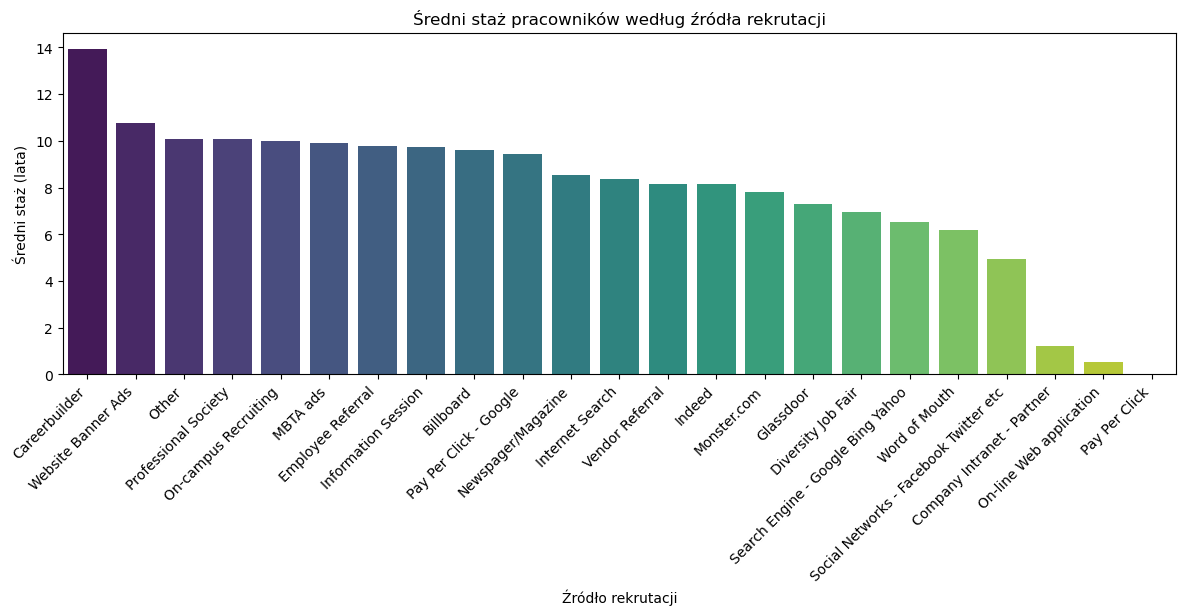

In [58]:
# Obliczenie stażu pracowników
df['DateofHire'] = pd.to_datetime(df['DateofHire'], format='%m/%d/%Y')  # Jawnie określ format daty
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], format='%m/%d/%Y', errors='coerce')  # Jawnie określ format daty
df['Tenure'] = (df['DateofTermination'].fillna(pd.Timestamp.now()) - df['DateofHire']).dt.days / 365

# Grupowanie danych według źródła rekrutacji i obliczenie średniego stażu
recruitment_tenure = df.groupby('RecruitmentSource')['Tenure'].mean().sort_values(ascending=False)

# Wizualizacja
plt.figure(figsize=(12, 6))
sns.barplot(x=recruitment_tenure.index, y=recruitment_tenure.values, hue=recruitment_tenure.index, palette='viridis', legend=False)

# Poprawa czytelności etykiet na osi X
plt.xticks(rotation=45, ha='right')  # Obracanie etykiet o 45 stopni i wyrównanie do prawej
plt.tight_layout()  # Automatyczne dostosowanie układu, aby etykiety się nie nakładały

plt.title('Średni staż pracowników według źródła rekrutacji')
plt.xlabel('Źródło rekrutacji')
plt.ylabel('Średni staż (lata)')
plt.show()

### Wnioski:
Źródła rekrutacji, takie jak Careerbuilder, są najbardziej w pozyskiwaniu najbardziej oddanych firmie pracowników.<br>

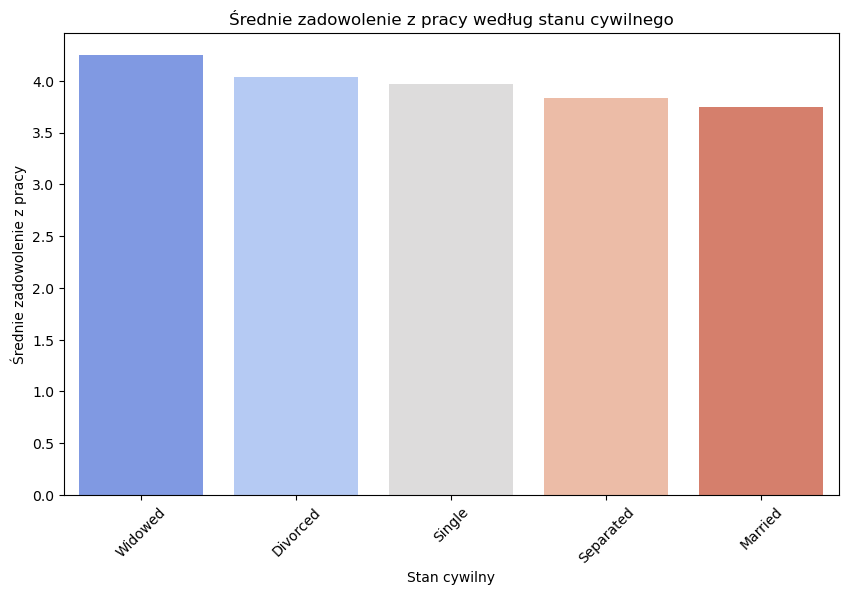

In [43]:
# Grupowanie danych według stanu cywilnego i obliczenie średniego zadowolenia
marital_satisfaction = df.groupby('MaritalDesc')['EmpSatisfaction'].mean().sort_values(ascending=False)

# Wizualizacja
plt.figure(figsize=(10, 6))
sns.barplot(x=marital_satisfaction.index, y=marital_satisfaction.values, hue=marital_satisfaction.index, palette='coolwarm', legend=False)
plt.title('Średnie zadowolenie z pracy według stanu cywilnego')
plt.xlabel('Stan cywilny')
plt.ylabel('Średnie zadowolenie z pracy')
plt.xticks(rotation=45)
plt.show()

### Wnioski:
Jeśli pracownicy będący w związku małżeńskim mają wyższą średnią satysfakcję, może to sugerować, że stabilność osobista wpływa pozytywnie na zadowolenie z pracy.<br>
Jeśli pracownicy rozwiedzeni mają niższą satysfakcję, może to wskazywać na potrzebę wsparcia psychologicznego w miejscu pracy.<br>

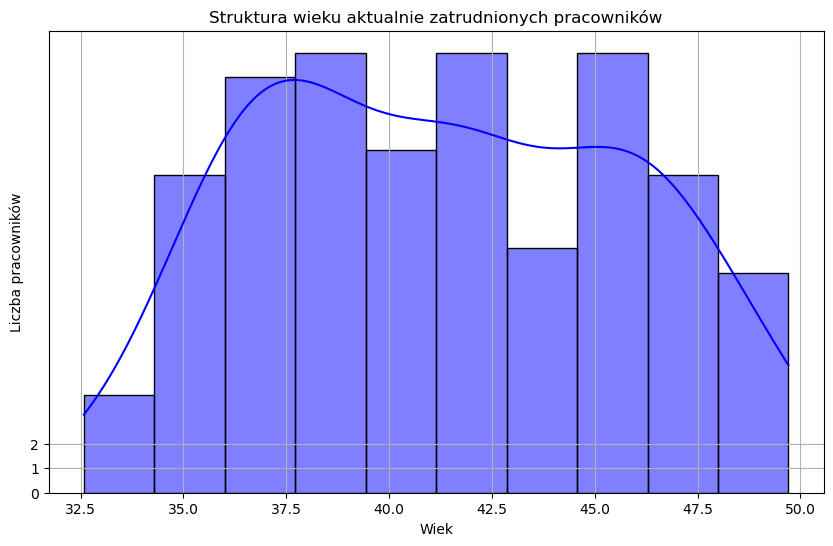

In [53]:
import numpy as np  # Do generowania zakresu wartości całkowitych

# Obliczenie wieku pracowników
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%Y')  # Jawnie określ format daty
df['Age'] = (pd.Timestamp.now() - df['DOB']).dt.days / 365

# Filtrowanie tylko aktywnych pracowników
active_employees = df[df['EmploymentStatus'] == 'Active']

# Wizualizacja struktury wieku
plt.figure(figsize=(10, 6))
sns.histplot(active_employees['Age'], bins=10, kde=True, color='blue')

# Ustawienie osi Y na wartości całkowite
max_count = int(active_employees['Age'].value_counts().max())  # Maksymalna liczba pracowników w jednym przedziale
plt.yticks(np.arange(0, max_count + 1, 1))  # Oś Y od 0 do max_count z krokiem 1

plt.title('Struktura wieku aktualnie zatrudnionych pracowników')
plt.xlabel('Wiek')
plt.ylabel('Liczba pracowników')
plt.grid(True)
plt.show()

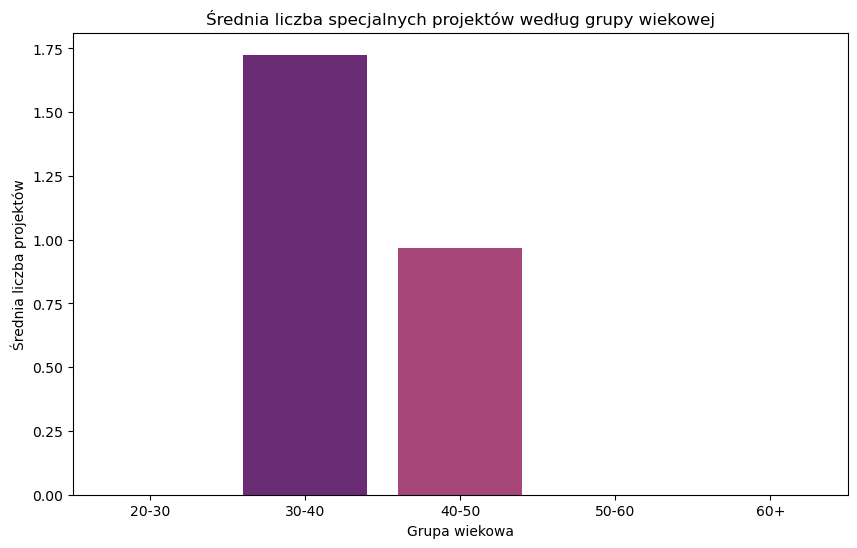

In [45]:
# Obliczenie wieku pracowników
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%Y')  # Jawnie określ format daty
df['Age'] = (pd.Timestamp.now() - df['DOB']).dt.days / 365

# Podział na grupy wiekowe
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Grupowanie danych według grupy wiekowej i obliczenie średniej liczby projektów
age_projects = df.groupby('AgeGroup', observed=False)['SpecialProjectsCount'].mean()  # Dodano observed=False

# Wizualizacja
plt.figure(figsize=(10, 6))
sns.barplot(x=age_projects.index, y=age_projects.values, hue=age_projects.index, palette='magma', legend=False)  # Dodano hue i legend=False
plt.title('Średnia liczba specjalnych projektów według grupy wiekowej')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Średnia liczba projektów')
plt.show()

### Wnioski:
Jeśli starsi pracownicy (np. 50+) mają wyższą średnią liczbę specjalnych projektów, może to sugerować, że doświadczenie zawodowe jest cenione przy przydzielaniu bardziej wymagających zadań.<br>
Jeśli młodsi pracownicy (np. 20-30) mają mniej projektów, może to wskazywać na potrzebę większego zaangażowania ich w specjalne inicjatywy.<br>